<h1><center>Préparation des données : </center></h1>

## Importer les librairies :

In [36]:
import pandas as pd
pd.set_option('display.max_columns', None) #pour arriver à visualiser toutes les colonnes

## Analyser et préparer les données :

In [37]:
data=pd.read_csv('ozone_complet.csv', sep=';')
data.head()

,date,maxO3,T6,T9,T12,T15,T18,Ne6,Ne9,Ne12,Ne15,Ne18,Vdir6,Vvit6,Vdir9,Vvit9,Vdir12,Vvit12,Vdir15,Vvit15,Vdir18,Vvit18,Vx,maxO3v
0,19950401,"47,6","10,1","11,6","13,3","13,6","12,2",8.0,8.0,8.0,8.0,8.0,270.0,2.0,290.0,4.0,300.0,4.0,340.0,4.0,20.0,4.0,"-3,4641","62,2"
1,19950402,"56,2","9,5","9,4","13,8","17,4","16,3",8.0,8.0,7.0,0.0,0.0,100.0,2.0,160.0,2.0,180.0,3.0,110.0,1.0,350.0,2.0,0,"47,6"
2,19950403,"61,8","3,6",8,"16,8","21,5","20,2",4.0,5.0,2.0,2.0,3.0,310.0,2.0,20.0,2.0,340.0,1.0,170.0,2.0,170.0,3.0,"-0,342","56,2"
3,19950404,"50,8","9,5","10,5","11,4","12,2","11,4",8.0,7.0,7.0,7.0,8.0,20.0,3.0,10.0,4.0,350.0,3.0,350.0,3.0,350.0,4.0,"-0,5209","61,8"
4,19950405,"59,8","9,8","10,8","13,8","14,3","13,3",8.0,7.0,8.0,8.0,7.0,330.0,2.0,340.0,2.0,280.0,1.0,320.0,3.0,350.0,4.0,"-0,9848","50,8"


> Nous voulons savoir les types de données et si nous avons des valeurs nulles

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1464 non-null   int64  
 1   maxO3   1391 non-null   object 
 2   T6      1463 non-null   object 
 3   T9      1463 non-null   object 
 4   T12     1463 non-null   object 
 5   T15     1463 non-null   object 
 6   T18     1463 non-null   object 
 7   Ne6     1462 non-null   float64
 8   Ne9     1462 non-null   float64
 9   Ne12    1462 non-null   float64
 10  Ne15    1462 non-null   float64
 11  Ne18    1459 non-null   float64
 12  Vdir6   1463 non-null   float64
 13  Vvit6   1463 non-null   float64
 14  Vdir9   1463 non-null   float64
 15  Vvit9   1463 non-null   float64
 16  Vdir12  1463 non-null   float64
 17  Vvit12  1463 non-null   float64
 18  Vdir15  1463 non-null   float64
 19  Vvit15  1463 non-null   float64
 20  Vdir18  1463 non-null   float64
 21  Vvit18  1463 non-null   float64
 22  

**Remarque :** Nous pouvons voir qu'il existe des colonnes de `dtype` "object" alors qu'elle doivent être des nombre, ainsi que la colonne `date` doit être de type date. De plus, nous pouvons voir que la colonne `maxO3` contient des valeurs nulles.  

> Nous allons transformer les colonnes de type `object` au type `float`, ainsi qu'on va transformer notre colonne `date` au type `datetime`.

In [39]:
data.date

0       19950401
1       19950402
2       19950403
3       19950404
4       19950405
          ...   
1459    20020926
1460    20020927
1461    20020928
1462    20020929
1463    20020930
Name: date, Length: 1464, dtype: int64

In [40]:
object_list= ['maxO3', 'T6', 'T9', 'T12','T15', 'T18', 'Vx', 'maxO3v']
for column in object_list :
    data[column] = data[column].apply(lambda x: str(x).replace(',', '.'))
    data[column] = data[column].astype(float)
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
# data['day_of_week'] = data['date'].dt.dayofweek
# data['month'] = data['date'].dt.month
# data['year'] = data['date'].dt.year

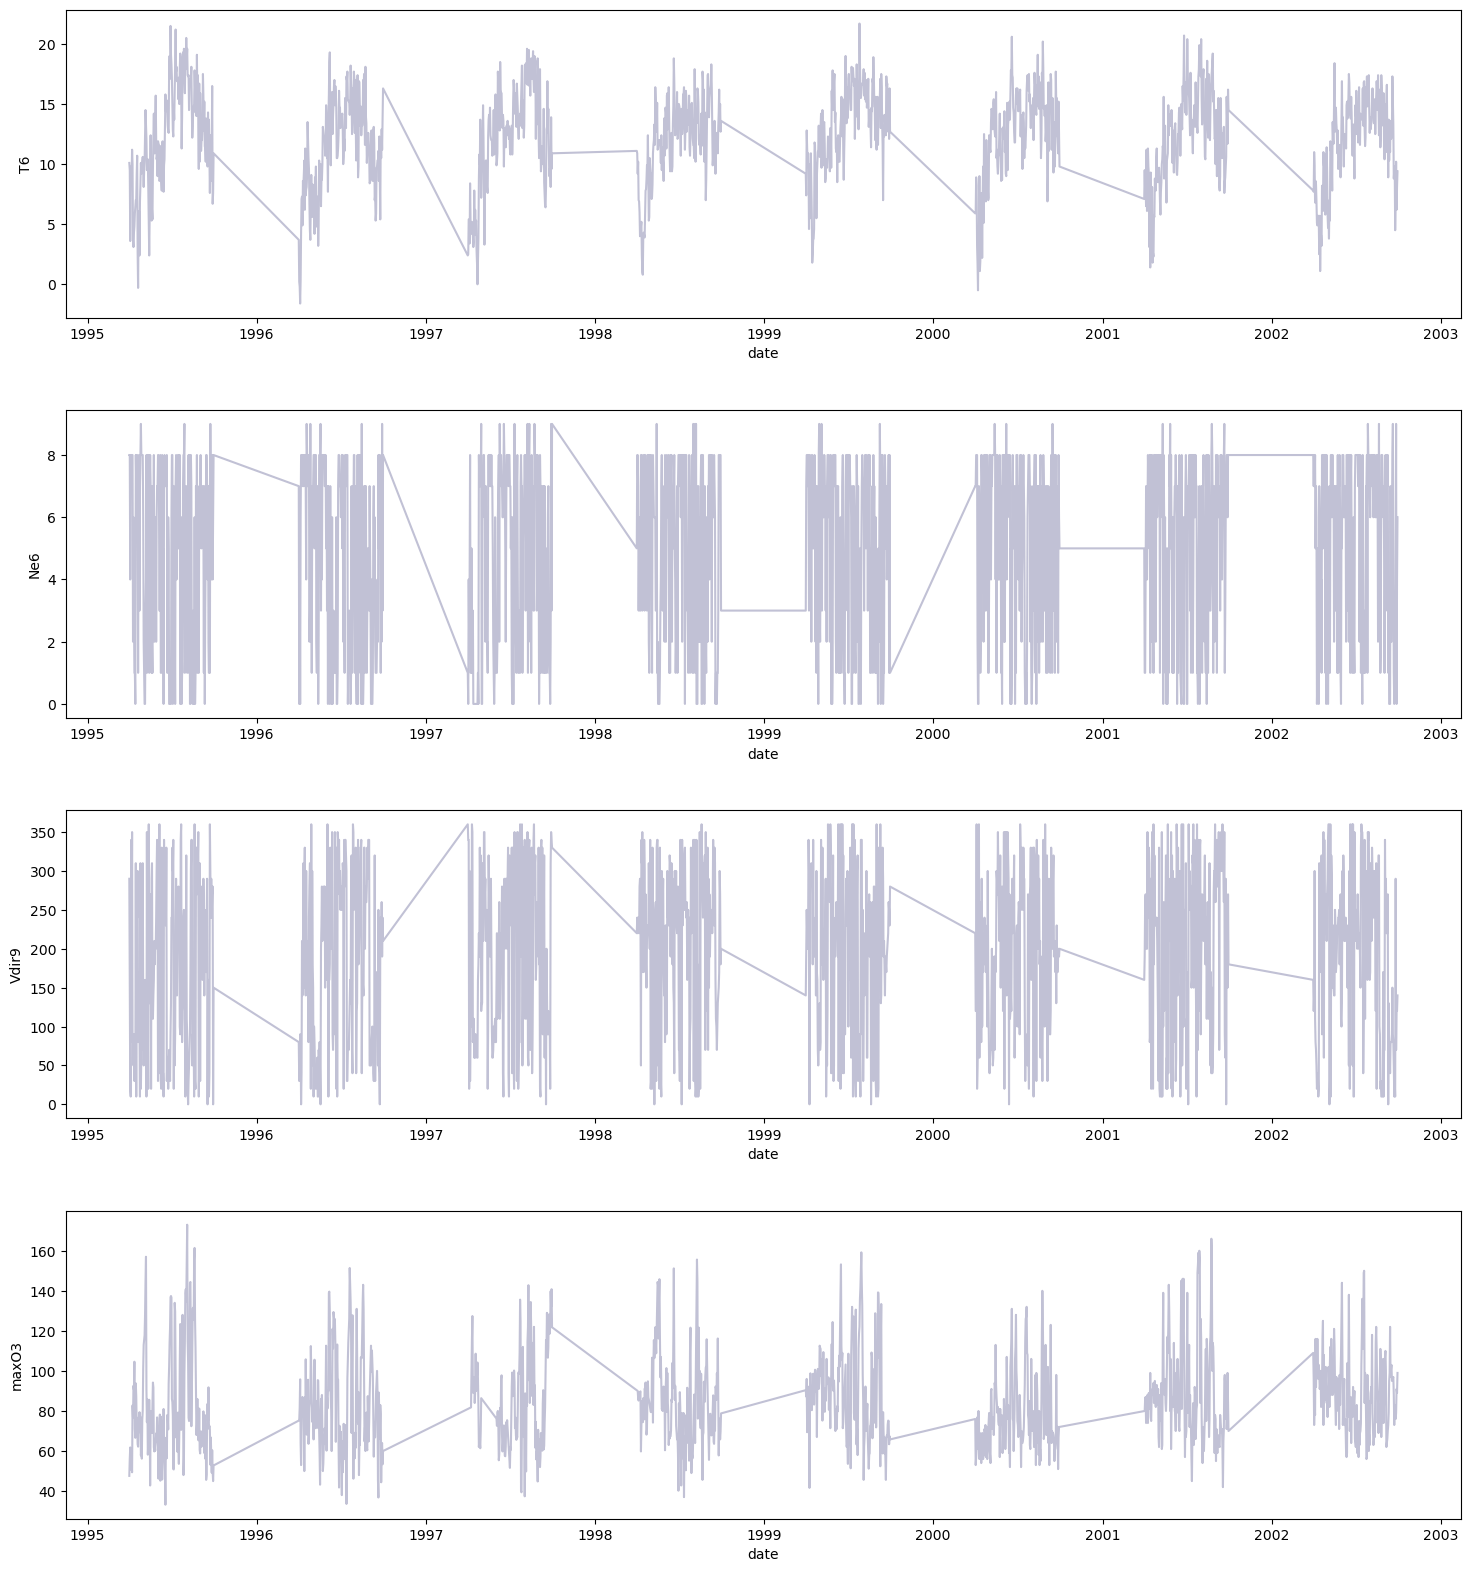

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
color_1 = '#BFAF9D'
color_2 = '#C1C1D5'
color_3 = '#A16F86'
color_4 = sns.diverging_palette(h_neg = 32, h_pos = 32, s = 21, l = 68, as_cmap = True)
# Display line graphs
plt.figure(figsize = (18, 30))

plt.subplot(611)
sns.lineplot(data = data, x = 'date', y = 'T6', color = color_2)
# sns.lineplot(data = data, x = 'date', y = 'T12', color = color_3, lw = 3)

plt.subplot(612)
sns.lineplot(data = data, x = 'date', y = 'Ne6', color = color_2)
# sns.lineplot(data = data, x = 'date', y = 'Ne9', color = color_3, lw = 3)

plt.subplot(613)
sns.lineplot(data = data, x = 'date', y = 'Vdir9', color = color_2)
# sns.lineplot(data = data, x = 'date', y = 'Vdir12', color = color_3, lw = 3)

plt.subplot(614)
sns.lineplot(data = data, x = 'date', y = 'maxO3', color = color_2)



plt.subplots_adjust(hspace = 0.3)
plt.show()


> Génèration des statistiques descriptives pour nos colonnes.

In [21]:
data.describe()

,maxO3,T6,T9,T12,T15,T18,Ne6,Ne9,Ne12,Ne15,Ne18,Vdir6,Vvit6,Vdir9,Vvit9,Vdir12,Vvit12,Vdir15,Vvit15,Vdir18,Vvit18,Vx,maxO3v,maxO3l,day_of_week,month,year
count,1369.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1388.000000,1388.000000,1388.000000,1388.000000,1385.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1360.000000,1390.000000,1390.000000,1390.000000,1390.000000
mean,84.928269,12.303096,16.388913,19.420806,20.346364,18.783153,4.998559,5.159942,5.337176,5.150576,4.716245,192.562995,2.473722,195.766739,3.732901,205.017999,4.508279,208.351332,4.782577,190.820734,4.392369,-0.747871,85.037059,85.097410,3.006475,6.533094,1998.536691
std,23.319656,3.900146,4.129406,4.927963,5.271608,5.080891,2.911083,2.565999,2.316706,2.324679,2.634460,112.587064,1.582116,107.133560,1.873504,105.910096,2.057032,110.604589,2.063882,121.461633,1.766066,3.402245,23.320063,23.303624,2.008789,1.698680,2.323020
min,33.200000,-1.600000,4.500000,3.900000,6.500000,4.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.392300,33.200000,33.200000,0.000000,4.000000,1995.000000
25%,68.000000,10.000000,13.800000,16.200000,16.800000,15.500000,2.000000,3.000000,4.000000,3.000000,2.000000,90.000000,1.000000,100.000000,2.000000,110.000000,3.000000,100.000000,3.000000,60.000000,3.000000,-3.064200,68.000000,68.050000,1.000000,5.000000,1996.000000
50%,80.400000,12.700000,16.700000,19.400000,20.400000,18.600000,6.000000,6.000000,6.000000,6.000000,5.000000,220.000000,2.000000,210.000000,4.000000,220.000000,4.000000,230.000000,5.000000,220.000000,4.000000,-1.026100,81.000000,81.000000,3.000000,7.000000,1999.000000
75%,98.000000,15.100000,19.000000,22.600000,23.800000,22.000000,8.000000,7.000000,7.000000,7.000000,7.000000,290.000000,3.000000,290.000000,5.000000,300.000000,6.000000,300.000000,6.000000,290.000000,6.000000,1.500000,98.000000,98.000000,5.000000,8.000000,2001.000000
max,173.000000,21.700000,28.600000,33.500000,35.500000,34.100000,9.000000,9.000000,8.000000,8.000000,8.000000,360.000000,11.000000,360.000000,12.000000,360.000000,12.000000,360.000000,16.000000,360.000000,12.000000,10.832900,173.000000,173.000000,6.000000,9.000000,2002.000000


> Normalement, nous voulons prévoir le pic d’ozone journalier pour le lendemain, or pour chaque ligne nous avons que le pic d'ozone de la veille et du jour, donc nous allons ajouter une colonne `maxO3l` pour avoir le pic d'ozone du lendemain.

In [41]:
for x in range(len(data)-1) :
    data.loc[x,'maxO3l'] = data.loc[x+1,'maxO3']

> Puisque notre cible est la colonne `maxO3l` nous allons garder que les lignes dont cette colonne n'est pas manquante.

In [42]:
data=data[data['maxO3l'].notna()] #garder que les lignes dont maxO3l n'est pas manquantes
data.drop_duplicates(inplace=True) #supprimer les lignes dupliquer

> Une visualisation statistique sur la colonne `maxO3`

<AxesSubplot: xlabel='maxO3'>

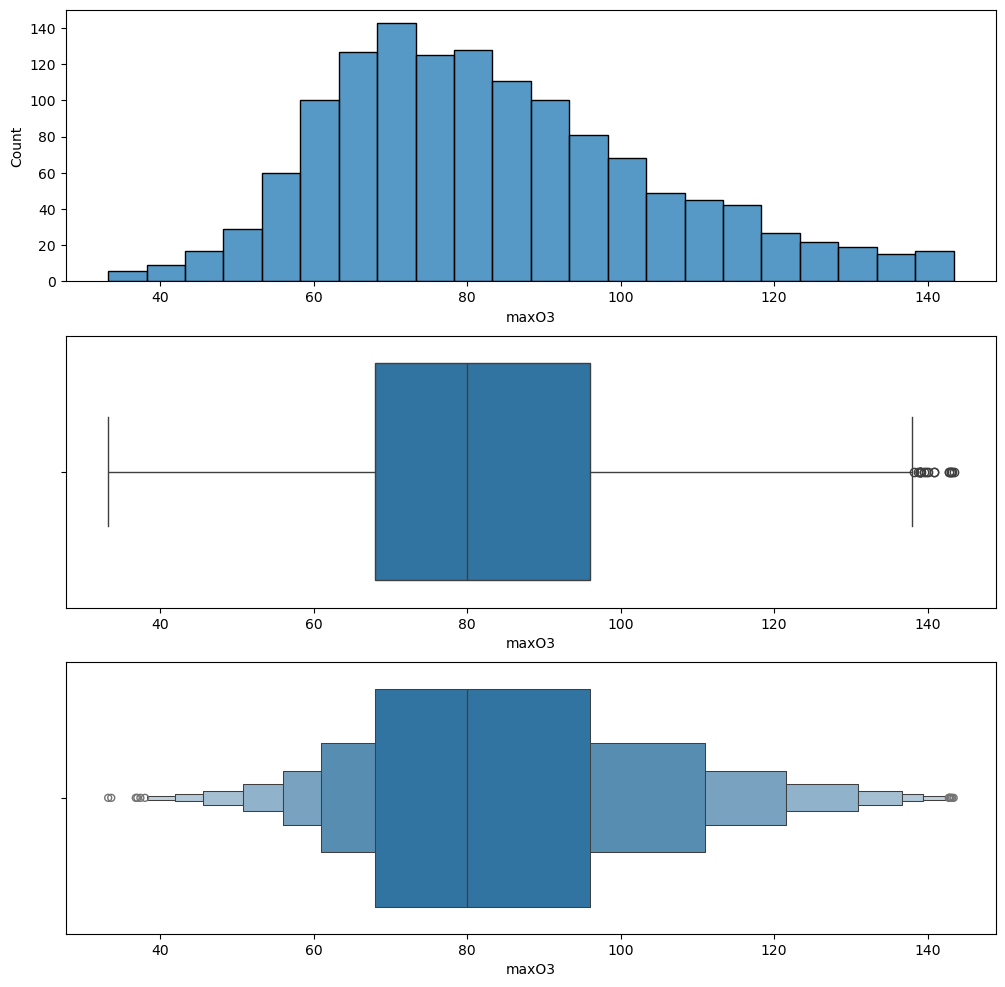

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(12, 12), nrows=3)
max_limit = data["maxO3"].quantile(.98)
df = data[data["maxO3"] < max_limit]["maxO3"]
sns.histplot(x=df, ax=axes[0])
sns.boxplot(x=df, ax=axes[1])
sns.boxenplot(x=df, ax=axes[2])

> Télecharger notre nouvelle dataset

In [43]:
data.drop(["date"],axis=1, inplace=True)

In [25]:
data.dropna(inplace=True)
data.to_csv('ozone_complet_preprocessed.csv')
data.dropna(inplace=True)

In [26]:
data.head()

,maxO3,T6,T9,T12,T15,T18,Ne6,Ne9,Ne12,Ne15,Ne18,Vdir6,Vvit6,Vdir9,Vvit9,Vdir12,Vvit12,Vdir15,Vvit15,Vdir18,Vvit18,Vx,maxO3v,maxO3l
0,47.6,10.1,11.6,13.3,13.6,12.2,8.0,8.0,8.0,8.0,8.0,270.0,2.0,290.0,4.0,300.0,4.0,340.0,4.0,20.0,4.0,-3.4641,62.2,56.2
1,56.2,9.5,9.4,13.8,17.4,16.3,8.0,8.0,7.0,0.0,0.0,100.0,2.0,160.0,2.0,180.0,3.0,110.0,1.0,350.0,2.0,0.0000,47.6,61.8
2,61.8,3.6,8.0,16.8,21.5,20.2,4.0,5.0,2.0,2.0,3.0,310.0,2.0,20.0,2.0,340.0,1.0,170.0,2.0,170.0,3.0,-0.3420,56.2,50.8
3,50.8,9.5,10.5,11.4,12.2,11.4,8.0,7.0,7.0,7.0,8.0,20.0,3.0,10.0,4.0,350.0,3.0,350.0,3.0,350.0,4.0,-0.5209,61.8,59.8
4,59.8,9.8,10.8,13.8,14.3,13.3,8.0,7.0,8.0,8.0,7.0,330.0,2.0,340.0,2.0,280.0,1.0,320.0,3.0,350.0,4.0,-0.9848,50.8,53.4
